In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Step 1: Data Acquisition

# loading dataset
dt = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Displaying info about the dataset
print(dt.info())

# Printing first few rows of dataset
print(dt.head())

# Displaing summary statistics of dataset
print(dt.describe(include='all').transpose())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5114 non-null   int64  
 1   gender             5114 non-null   object 
 2   age                5098 non-null   float64
 3   hypertension       5114 non-null   int64  
 4   heart_disease      5114 non-null   int64  
 5   ever_married       5114 non-null   object 
 6   work_type          5114 non-null   object 
 7   Residence_type     5114 non-null   object 
 8   avg_glucose_level  5102 non-null   float64
 9   bmi                4907 non-null   float64
 10  smoking_status     5114 non-null   object 
 11  stroke             5114 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.6+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

In [2]:
# Step 2: Data Wrangling

# Handling missing values
print(dt.isnull().sum()) # Finding null values in each column
# Null values filled with mean value of column
dt.fillna({'age':dt['age'].mean(),'avg_glucose_level':dt['avg_glucose_level'].mean(),'bmi':dt['bmi'].mean()}, inplace=True)
print("\nAfter handling missing values")
print(dt.isnull().sum())

# Handling duplicates
print("\nDuplicates found = ",dt.duplicated().sum())
dt.drop_duplicates(inplace=True)
print("Duplicates found after handling = ",dt.duplicated().sum())

# Outlier detection and treatment
for column in ['bmi', 'avg_glucose_level', 'age']:
    upper_limit = dt[column].quantile(0.99)
    lower_limit = dt[column].quantile(0.01)
    print(f"\nBefore capping ({column}):")
    print(dt[column].describe())

    # Cap outliers
    dt[column] = np.where(dt[column] > upper_limit, upper_limit, dt[column])
    dt[column] = np.where(dt[column] < lower_limit, lower_limit, dt[column])
    print(f"\nAfter capping ({column}):")
    print(dt[column].describe(),"\n")

# Encoding categorical variables
dt = pd.get_dummies(dt, columns=['work_type', 'smoking_status'], drop_first=True)
dt['ever_married'] = dt['ever_married'].map({'Yes': 1, 'No': 0})
dt['Residence_type'] = dt['Residence_type'].map({'Urban': 1, 'Rural': 0})
dt['gender'] = dt['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
print(dt.columns)

id                     0
gender                 0
age                   16
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level     12
bmi                  207
smoking_status         0
stroke                 0
dtype: int64

After handling missing values
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Duplicates found =  4
Duplicates found after handling =  0

Before capping (bmi):
count    5110.000000
mean       28.888152
std         7.690713
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

After capping (bmi):
count    5110.000000
mean       28.837154
std         7.398173
min  

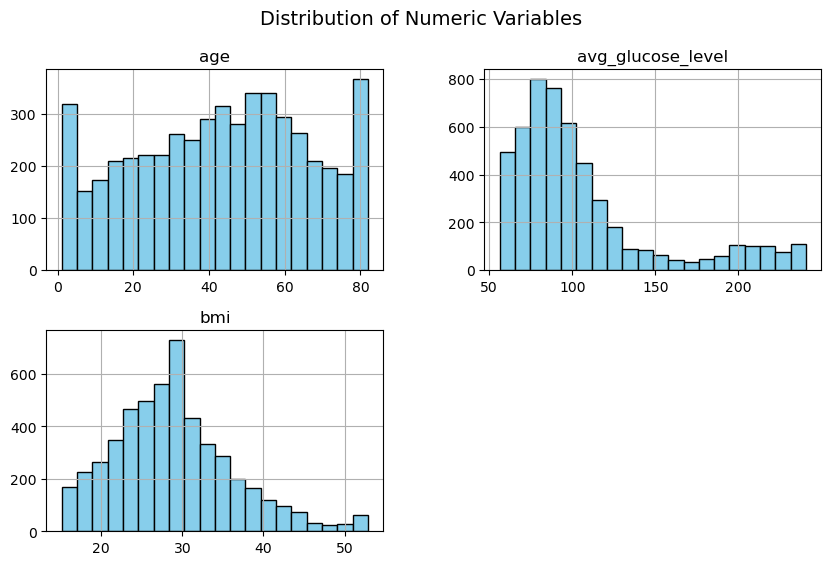

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x=col, palette="viridis")


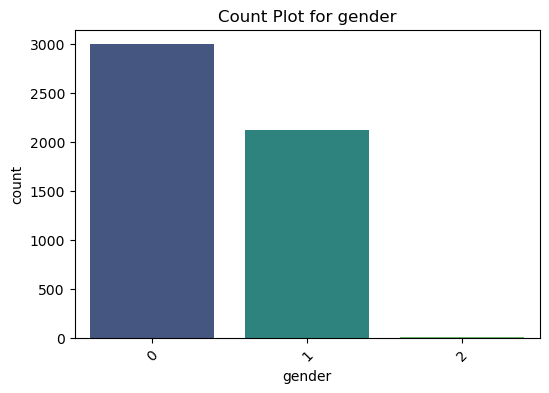

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x=col, palette="viridis")


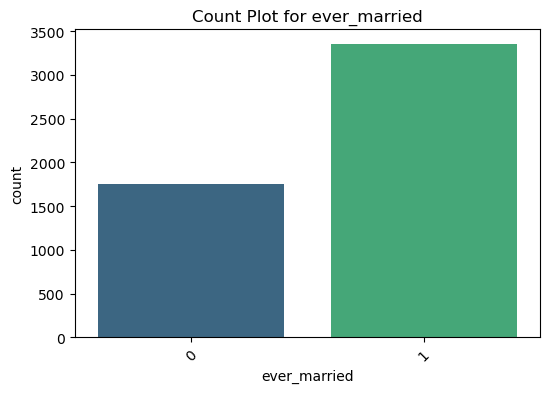

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x=col, palette="viridis")


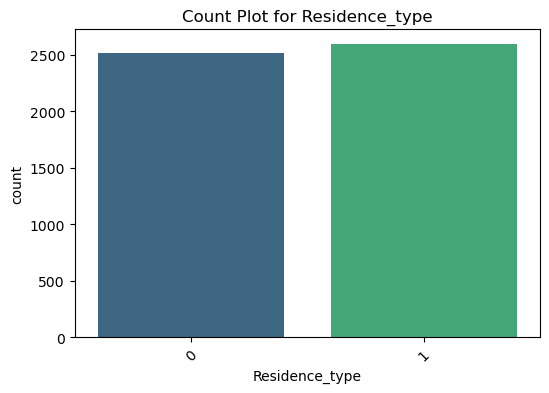

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=dt, palette="coolwarm")


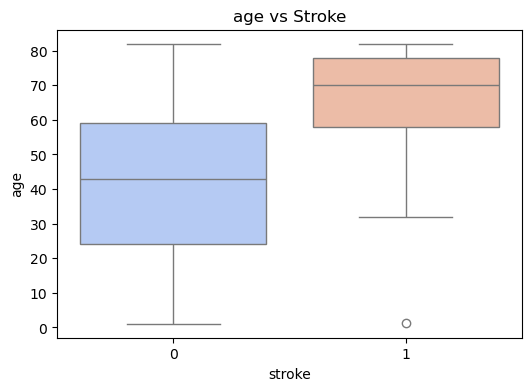

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=dt, palette="coolwarm")


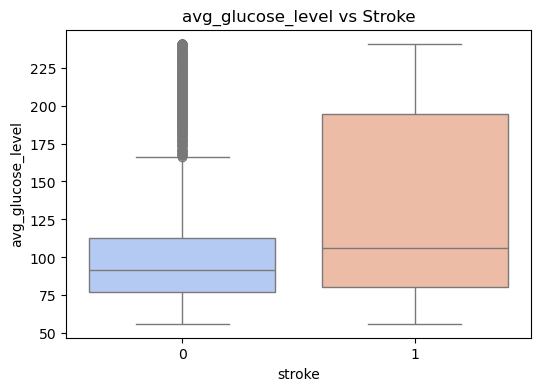

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\3776357734.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=dt, palette="coolwarm")


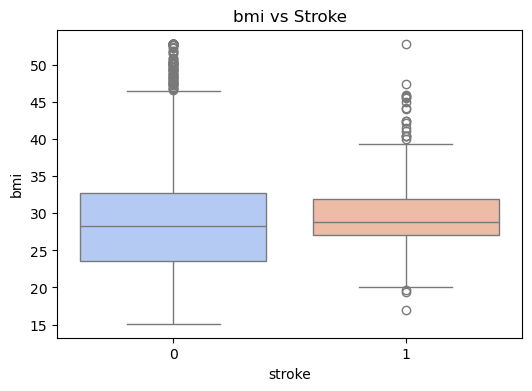

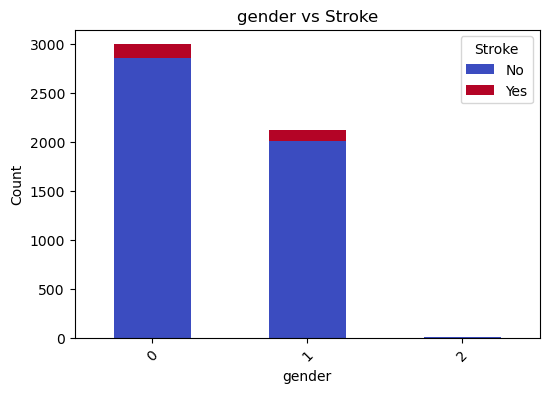

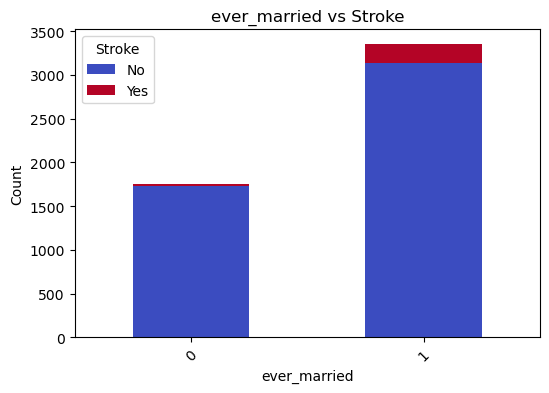

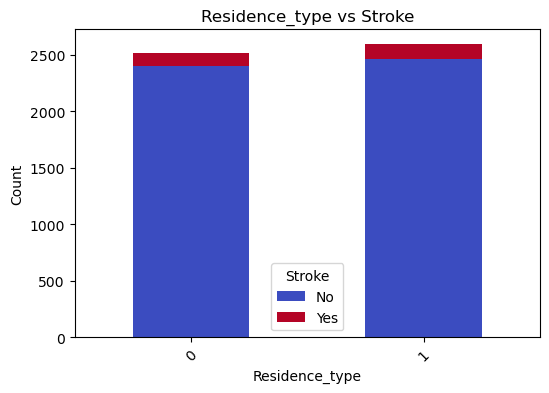

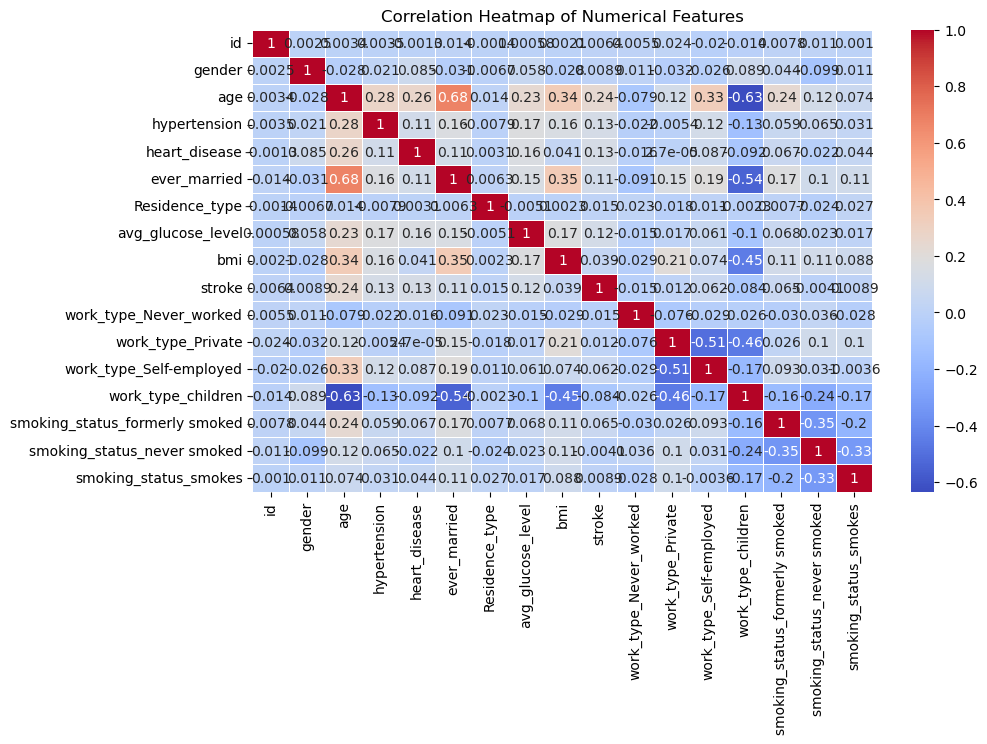

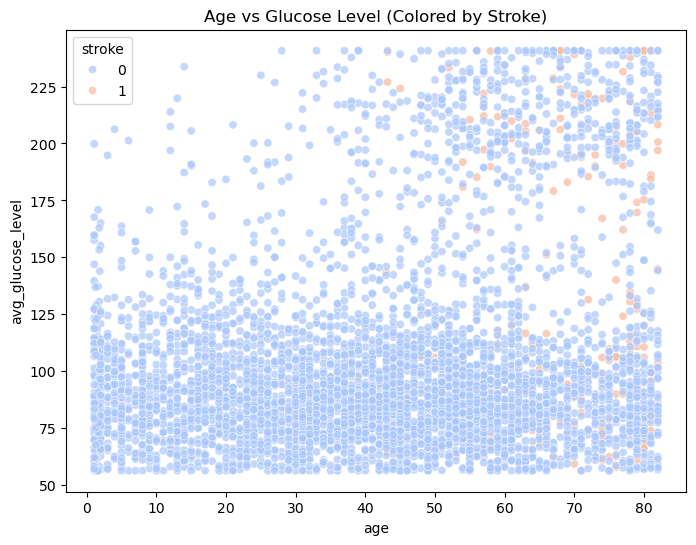

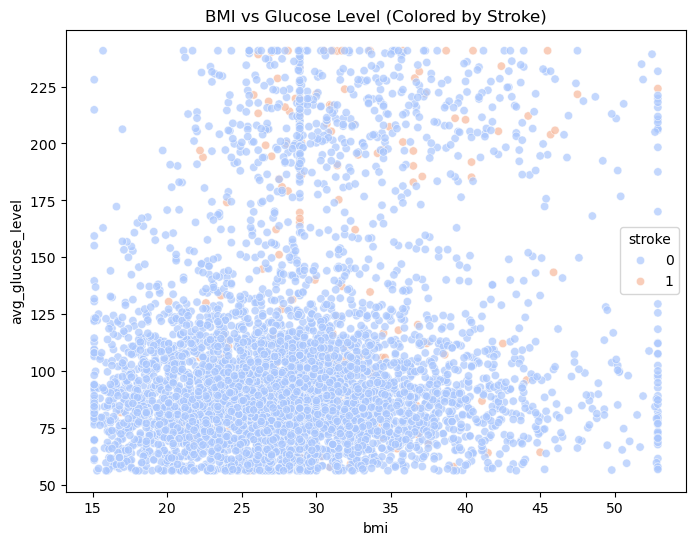

In [3]:
#Step 3: Data Exploration

import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Numeric variable distributions
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
dt[numeric_cols].hist(figsize=(10,6), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables", fontsize=14)
plt.show()

# Categorical variable distributions
categorical_cols = ['gender', 'ever_married', 'Residence_type']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=dt, x=col, palette="viridis")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis
# Relationship between numeric variables and stroke
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='stroke', y=col, data=dt, palette="coolwarm")
    plt.title(f"{col} vs Stroke")
    plt.show()

# Relationship between categorical variables and stroke
for col in categorical_cols:
    cross_tab = pd.crosstab(dt[col], dt['stroke'])
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
    plt.title(f"{col} vs Stroke")
    plt.ylabel("Count")
    plt.legend(title="Stroke", labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.show()

# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Multivariate Patterns
plt.figure(figsize=(8,6))
sns.scatterplot(data=dt, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)
plt.title("Age vs Glucose Level (Colored by Stroke)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=dt, x='bmi', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)
plt.title("BMI vs Glucose Level (Colored by Stroke)")
plt.show()


Training set: (4088, 16)
Testing set: (1022, 16)

Accuracy: 0.8816

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       972
           1       0.19      0.42      0.26        50

    accuracy                           0.88      1022
   macro avg       0.58      0.66      0.60      1022
weighted avg       0.93      0.88      0.90      1022



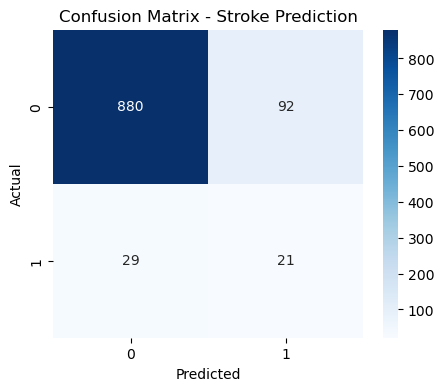

C:\Users\zaidm\AppData\Local\Temp\ipykernel_22428\4232905735.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=features.index, palette='coolwarm')


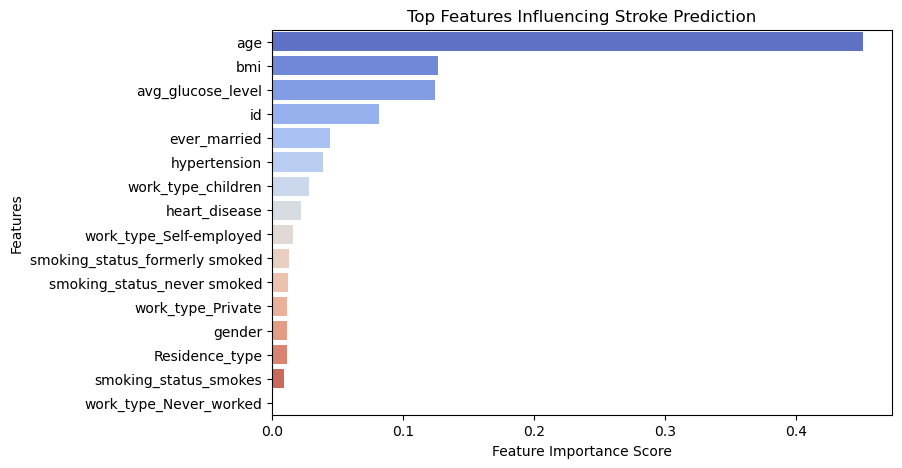


Predictive Features:
 age                               0.450528
bmi                               0.126301
avg_glucose_level                 0.124454
id                                0.081878
ever_married                      0.044466
hypertension                      0.038854
work_type_children                0.028332
heart_disease                     0.022191
work_type_Self-employed           0.015672
smoking_status_formerly smoked    0.012825
smoking_status_never smoked       0.011922
work_type_Private                 0.011380
gender                            0.011225
Residence_type                    0.011196
smoking_status_smokes             0.008768
work_type_Never_worked            0.000009
dtype: float64


In [4]:
#Step 4: Data Mining and Analysis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Defining features and target
x = dt.drop('stroke', axis=1)
y = dt['stroke']

# Split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", x_train.shape)
print("Testing set:", x_test.shape)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, class_weight='balanced')
rf_model.fit(x_train, y_train)

# Predictions
y_pred = rf_model.predict(x_test)

print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Stroke Prediction')
plt.show()

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
features = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=features, y=features.index, palette='coolwarm')
plt.title("Top Features Influencing Stroke Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

print("\nPredictive Features:\n", features)